# 2. 작업형 제 1유형 : 데이터 처리 영역

mtcars 데이터셋(mtcars.csv)의 qsec 컬럼을 최소최대 척도(Min-Max Scale)로 변환한 후
0.5보다 큰 값을 가지는 레코드 수를 구하시오.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()

mtcars = pd.read_csv('./kaggle/bda_prac/mtcars.csv')
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [2]:
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

sc_input = np.array(mtcars['qsec']).reshape(-1, 1)

sc.fit(sc_input)
mtcars['qsec'] = sc.transform(sc_input)
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,0.233333,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,0.300000,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,0.489286,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,0.588095,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,0.300000,0,0,3,2


In [4]:
mtcars['qsec'][mtcars['qsec'] > 0.5].count()

9

# 3. 작업형 제 2유형

In [5]:
# <문제>
# 고객 3,500 명에 대한 학습용 데이터(y_train.csv, X_train.csv)를 이용하여 성별예측
# 모형을 만든 후, 이를 평가용 데이터(X_test.csv)에 적용하여 얻은 2,482 명 고객의 성별
# 예측값(남자일 확률)을 다음과 같은 형식의 CSV 파일로 생성하시오.
# (제출한 모델의 성능은 ROC-AUC 평가지표에 따라 채점)

# <제출형식> custid, gender

# <유의사항>
# 성능이 우수한 예측모형을 구축하기 위해서는 적절한 데이터 전처리, Feature
# Engineering, 분류 알고리즘 사용, 초매개변수 최적화, 모형 앙상블 등이 수반되어야
# 한다

In [6]:
X_train_test = pd.read_csv('./kaggle/bda_prac/X_train.csv', encoding='CP949')
X_sub  = pd.read_csv('./kaggle/bda_prac/X_test.csv', encoding='CP949')
y_train_test = pd.read_csv('./kaggle/bda_prac/y_train.csv', encoding='CP949')

In [7]:
X_train_test.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85


In [8]:
X_sub.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
0,3500,70900400,22000000,4050000.0,골프,부산본점,13,1.461538,0.789474,26
1,3501,310533100,38558000,48034700.0,농산물,잠실점,90,2.433333,0.369863,3
2,3502,305264140,14825000,30521000.0,가공식품,본 점,101,14.623762,0.083277,3
3,3503,7594080,5225000,NaN,주방용품,부산본점,5,2.000000,0.000000,47
4,3504,1795790,1411200,NaN,수산품,청량리점,3,2.666667,0.125000,8


In [9]:
y_train_test.head()

,cust_id,gender
0,0,0
1,1,0
2,2,1
3,3,1
4,4,0


## df

In [10]:
train_test = pd.concat([X_train_test, y_train_test['gender']], axis=1)
train_test.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,0
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,0
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16,1
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85,0


In [11]:
train_test.shape

(3500, 11)

In [12]:
df = pd.concat([train_test, X_sub])
df.head()

,cust_id,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기,gender
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,0.0
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,0.0
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1,1.0
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16,1.0
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85,0.0


In [13]:
df.shape

(5982, 11)

In [14]:
X = df.drop('gender', axis=1)
y = df['gender']
X.columns = ['cust_id', 'total_purch', 'max_purch', 'refund', 'main_prod', 'main_branch', 
             'visit_days', 'amount_per_visit', 'weekend_rate', 'period']
X.isna().sum()

cust_id                0
total_purch            0
max_purch              0
refund              3906
main_prod              0
main_branch            0
visit_days             0
amount_per_visit       0
weekend_rate           0
period                 0
dtype: int64

In [15]:
y.head()

0    0.0
1    0.0
2    1.0
3    1.0
4    0.0
Name: gender, dtype: float64

In [16]:
y.isna().sum()

2482

## endcode

In [17]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

oe = OrdinalEncoder()
X[['main_prod', 'main_branch']] = oe.fit_transform(X[['main_prod', 'main_branch']])

In [18]:
X[['main_prod', 'main_branch']].head(10)

,main_prod,main_branch
0,5.0,0.0
1,21.0,19.0
2,6.0,1.0
3,5.0,2.0
4,15.0,8.0
5,11.0,18.0
6,22.0,0.0
7,13.0,8.0
8,5.0,8.0
9,9.0,5.0


In [19]:
X.head(10)

,cust_id,total_purch,max_purch,refund,main_prod,main_branch,visit_days,amount_per_visit,weekend_rate,period
0,0,68282840,11264000,6860000.0,5.0,0.0,19,3.894737,0.527027,17
1,1,2136000,2136000,300000.0,21.0,19.0,2,1.500000,0.000000,1
2,2,3197000,1639000,NaN,6.0,1.0,2,2.000000,0.000000,1
3,3,16077620,4935000,NaN,5.0,2.0,18,2.444444,0.318182,16
4,4,29050000,24000000,NaN,15.0,8.0,2,1.500000,0.000000,85
5,5,11379000,9552000,462000.0,11.0,18.0,3,1.666667,0.200000,42
6,6,10056000,7612000,4582000.0,22.0,0.0,5,2.400000,0.333333,42
7,7,514570080,27104000,29524000.0,13.0,8.0,63,2.634921,0.222892,5
8,8,688243360,173088000,NaN,5.0,8.0,18,5.944444,0.411215,15
9,9,26640850,13728000,NaN,9.0,5.0,1,12.000000,0.000000,0


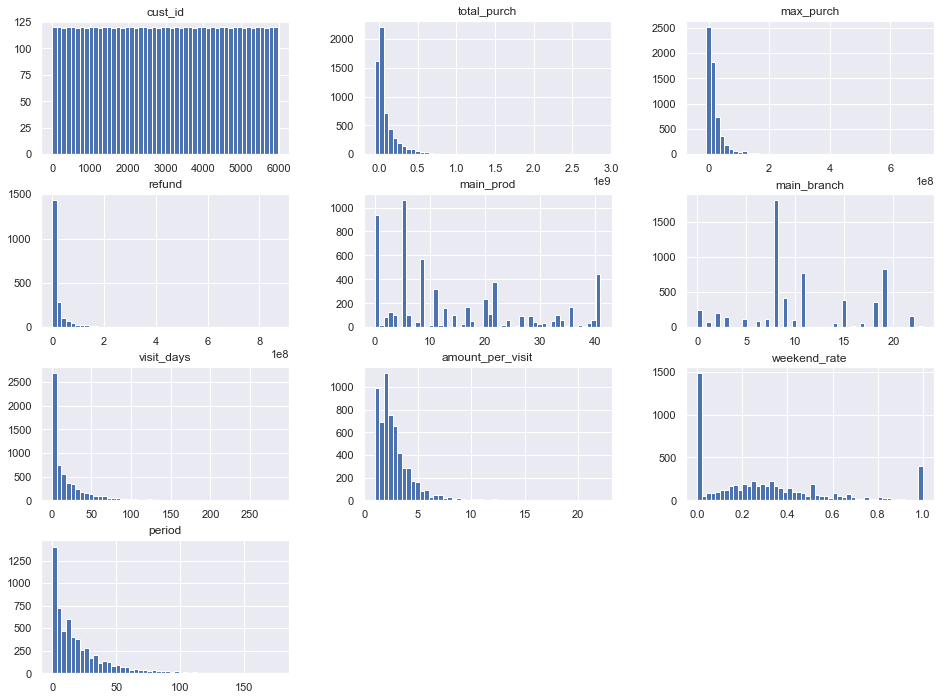

In [20]:
import matplotlib.pyplot as plt
sns.set()
X.hist(figsize=(16, 12), bins=50); plt.show()

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5982 entries, 0 to 2481
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           5982 non-null   int64  
 1   total_purch       5982 non-null   int64  
 2   max_purch         5982 non-null   int64  
 3   refund            2076 non-null   float64
 4   main_prod         5982 non-null   float64
 5   main_branch       5982 non-null   float64
 6   visit_days        5982 non-null   int64  
 7   amount_per_visit  5982 non-null   float64
 8   weekend_rate      5982 non-null   float64
 9   period            5982 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 514.1 KB


## missing values

In [22]:
X['refund'] = X['refund'].fillna(0)

In [23]:
X.isna().sum()

cust_id             0
total_purch         0
max_purch           0
refund              0
main_prod           0
main_branch         0
visit_days          0
amount_per_visit    0
weekend_rate        0
period              0
dtype: int64

## drop

In [24]:
X = X.drop('cust_id', axis=1)

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5982 entries, 0 to 2481
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   total_purch       5982 non-null   int64  
 1   max_purch         5982 non-null   int64  
 2   refund            5982 non-null   float64
 3   main_prod         5982 non-null   float64
 4   main_branch       5982 non-null   float64
 5   visit_days        5982 non-null   int64  
 6   amount_per_visit  5982 non-null   float64
 7   weekend_rate      5982 non-null   float64
 8   period            5982 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 467.3 KB


In [26]:
y.shape

(5982,)

## scale

In [27]:
df = pd.concat([X, y], axis=1)
df.shape

(5982, 10)

In [28]:
X_train_test = df[df['gender'].notna()].drop('gender', axis=1)
X_train_test.shape

(3500, 9)

In [29]:
y_train_test = df[df['gender'].notna()]['gender']
y_train_test.shape

(3500,)

In [30]:
y_train_test.isna().sum()

0

In [31]:
X_sub = df[df['gender'].isna()].drop('gender', axis=1)
X_sub.shape

(2482, 9)

In [32]:
y_sub = df[df['gender'].isna()]['gender']
y_sub.shape

(2482,)

In [33]:
y_sub.isna().sum()

2482

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
X_train_test.columns

Index(['total_purch', 'max_purch', 'refund', 'main_prod', 'main_branch',
       'visit_days', 'amount_per_visit', 'weekend_rate', 'period'],
      dtype='object')

In [36]:
sd_scaler = StandardScaler()

scale_cols = ['total_purch', 'max_purch', 'refund', 'visit_days', 'amount_per_visit', 'period']

sd_scaler.fit(X_train_test[scale_cols])

X_train_test[scale_cols] = sd_scaler.transform(X_train_test[scale_cols])
X_sub[scale_cols]        = sd_scaler.transform(X_sub[scale_cols])

In [37]:
X_train_test.head(10)

,total_purch,max_purch,refund,main_prod,main_branch,visit_days,amount_per_visit,weekend_rate,period
0,-0.144580,-0.262608,-0.047505,5.0,0.0,-0.009338,0.554247,0.527027,-0.159962
1,-0.549190,-0.547967,-0.265461,21.0,19.0,-0.635003,-0.698168,0.000000,-0.806554
2,-0.542700,-0.563504,-0.275429,6.0,1.0,-0.635003,-0.436675,0.000000,-0.806554
3,-0.463911,-0.460465,-0.275429,5.0,2.0,-0.046142,-0.204236,0.318182,-0.200374
4,-0.384561,0.135544,-0.275429,15.0,8.0,-0.635003,-0.698168,0.000000,2.588052
5,-0.492652,-0.316128,-0.260079,11.0,18.0,-0.598199,-0.611003,0.200000,0.850337
6,-0.500744,-0.376776,-0.123192,22.0,0.0,-0.524592,-0.227480,0.333333,0.850337
7,2.585286,0.232581,0.705509,13.0,8.0,1.610032,-0.104620,0.222892,-0.644906
8,3.647618,4.796324,-0.275429,5.0,8.0,-0.046142,1.626217,0.411215,-0.240786
9,-0.399297,-0.185578,-0.275429,9.0,5.0,-0.671807,4.793191,0.000000,-0.846966


In [38]:
X_sub.head(10)

,total_purch,max_purch,refund,main_prod,main_branch,visit_days,amount_per_visit,weekend_rate,period
0,-0.128569,0.073020,-0.140867,3.0,9.0,-0.230161,-0.718283,0.789474,0.203746
1,1.337225,0.590656,1.320528,9.0,19.0,2.603737,-0.210047,0.369863,-0.725730
2,1.304996,-0.151284,0.738634,0.0,8.0,3.008579,6.165384,0.083277,-0.725730
3,-0.515803,-0.451399,-0.275429,32.0,9.0,-0.524592,-0.436675,0.000000,1.052397
4,-0.551271,-0.570626,-0.275429,20.0,22.0,-0.598199,-0.088017,0.125000,-0.523670
5,-0.482736,-0.547217,-0.275429,41.0,19.0,-0.524592,-0.332077,0.000000,1.618164
6,2.012276,1.571093,1.039155,5.0,8.0,4.591145,-0.113440,0.249337,-0.766142
7,-0.555209,-0.578729,-0.275429,21.0,11.0,-0.671807,-0.959661,0.000000,-0.846966
8,-0.532741,-0.463903,-0.275429,41.0,18.0,-0.671807,-0.959661,0.000000,-0.846966
9,0.115412,-0.012775,0.490808,0.0,5.0,0.321897,0.254415,0.376344,-0.362022


## classifier.ensemble

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.2, random_state=0, shuffle=True, stratify=y_train_test)
rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
probas_pred = rfc.predict_proba(X_test)

In [41]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, probas_pred[:, 1])

0.6500639514143268

In [42]:
probas_pred_sub = rfc.predict_proba(X_sub)

In [43]:
probas_pred_sub

array([[0.6 , 0.4 ],
       [0.75, 0.25],
       [0.83, 0.17],
       ...,
       [0.49, 0.51],
       [0.49, 0.51],
       [0.52, 0.48]])

In [44]:
probas_pred_sub.shape

(2482, 2)

In [45]:
y_sub = probas_pred_sub[:, 1]; y_sub

array([0.4 , 0.25, 0.17, ..., 0.51, 0.51, 0.48])

In [46]:
df_sub = pd.DataFrame({'custid':range(3500, 5982), 'gender':y_sub})
df_sub.head(10)

,custid,gender
0,3500,0.40
1,3501,0.25
2,3502,0.17
3,3503,0.62
4,3504,0.45
5,3505,0.46
6,3506,0.35
7,3507,0.68
8,3508,0.10
9,3509,0.30


In [47]:
df_sub.tail(10)

,custid,gender
2472,5972,0.13
2473,5973,0.26
2474,5974,0.56
2475,5975,0.73
2476,5976,0.32
2477,5977,0.64
2478,5978,0.45
2479,5979,0.51
2480,5980,0.51
2481,5981,0.48


In [48]:
df_sub.to_csv('./kaggle/bda_prac/df_rfc_sub.csv', index=False)

In [49]:
pd.read_csv('./kaggle/bda_prac/df_rfc_sub.csv')

,custid,gender
0,3500,0.40
1,3501,0.25
2,3502,0.17
3,3503,0.62
4,3504,0.45
...,...,...
2477,5977,0.64
2478,5978,0.45
2479,5979,0.51
2480,5980,0.51


## gridsearchcv

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [51]:
rfc = RandomForestClassifier()
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

hyper_param = {'n_estimators':[200],
               'min_samples_split':[2],
               'min_samples_leaf':[2],
               }

gscv = GridSearchCV(rfc, param_grid=hyper_param, scoring='roc_auc', refit=True, cv=skfold)
gscv.fit(X_train_test, y_train_test)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [2], 'min_samples_split': [2],
                         'n_estimators': [200]},
             scoring='roc_auc')

In [52]:
gscv.best_score_

0.6445732548436244

In [53]:
gscv.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

In [54]:
probas_pred = gscv.predict_proba(X_sub)

In [55]:
probas_pred_sub = probas_pred[:, 1]

In [56]:
probas_pred_sub.shape

(2482,)

In [57]:
df_sub = pd.DataFrame({'custid':range(3500, 5982), 'gender':probas_pred_sub})
df_sub.head(10)

,custid,gender
0,3500,0.541607
1,3501,0.194119
2,3502,0.155554
3,3503,0.529452
4,3504,0.427279
5,3505,0.393230
6,3506,0.219833
7,3507,0.689158
8,3508,0.059835
9,3509,0.216750


In [58]:
df_sub.tail(10)

,custid,gender
2472,5972,0.130500
2473,5973,0.325333
2474,5974,0.534504
2475,5975,0.677733
2476,5976,0.375714
2477,5977,0.732202
2478,5978,0.602233
2479,5979,0.546179
2480,5980,0.485143
2481,5981,0.547186


In [59]:
df_sub.to_csv('./kaggle/bda_prac/df_gscv_sub.csv', index=False)

# boston quiz

## quiz1

In [60]:
# 보스턴 데이터 범죄율 컬럼 top10 중 10번째 범죄율 값으로  
# 1~10위의 범죄율 값을 변경

In [61]:
from sklearn.datasets import load_boston

boston = load_boston()

df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [62]:
target = df.sort_values(by='CRIM', ascending=False).iloc[9, 0]

In [63]:
df['CRIM'][df['CRIM'] >= target] = target

In [64]:
df.sort_values(by='CRIM', ascending=False).head(13)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
417,25.9406,0.0,18.1,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64
380,25.9406,0.0,18.1,0.0,0.671,6.968,91.9,1.4165,24.0,666.0,20.2,396.90,17.21
414,25.9406,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98
413,25.9406,0.0,18.1,0.0,0.597,5.155,100.0,1.5894,24.0,666.0,20.2,210.97,20.08
410,25.9406,0.0,18.1,0.0,0.597,5.757,100.0,1.4130,24.0,666.0,20.2,2.60,10.11
405,25.9406,0.0,18.1,0.0,0.693,5.683,100.0,1.4254,24.0,666.0,20.2,384.97,22.98
404,25.9406,0.0,18.1,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38
427,25.9406,0.0,18.1,0.0,0.679,6.202,78.7,1.8629,24.0,666.0,20.2,18.82,14.52
398,25.9406,0.0,18.1,0.0,0.693,5.453,100.0,1.4896,24.0,666.0,20.2,396.90,30.59
418,25.9406,0.0,18.1,0.0,0.679,5.957,100.0,1.8026,24.0,666.0,20.2,16.45,20.62


## quiz2

In [65]:
# AGE 변수 80이상의 범죄율 평균 산출

In [66]:
df[df['AGE'] >= 80]['CRIM'].mean()

5.759386625

# quiz3

In [67]:
# csv에서 80% 량의 데이터를 추출 후
# 'RAD'가 7인 값을 'RAD' 중앙값(median)으로 바꾸고
# 변경전, 변경 후 'RAD'의 표준편차 출력

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
df8, df2 = train_test_split(df, train_size=0.8, shuffle=False)

In [70]:
df8.shape

(404, 13)

In [71]:
df8['RAD'].describe()

count    404.000000
mean       6.789604
std        6.504268
min        1.000000
25%        4.000000
50%        5.000000
75%        6.000000
max       24.000000
Name: RAD, dtype: float64

In [72]:
df8['RAD'].std() # before std

6.50426779850157

In [73]:
target = df8['RAD'].median()

In [74]:
df8['RAD'][df8['RAD'] == 7] = target

c:\AI\pythonProject\venv\lib\site-packages\pandas\core\generic.py:8861: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [75]:
df8['RAD'].std()

6.513956770157352